In [69]:
import math
import os
import calendar
import numpy as np
from scipy import stats
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df.shape

(7043, 33)

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print(df[['Total Charges']].dtypes)

Total Charges    float64
dtype: object


In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [8]:
churn_df = df.rename(columns = {'Zip Code' : 'Zip_Code', 'Senior Citizen': 'Senior_Citizen', 'Tenure Months': 'Tenure_Months', 'Phone Service': 'Phone_Service', 'Multiple Lines': 'Multiple_Lines', 'Internet Service': 'Internet_Service', 'Online Security': 'Online_Security', 'Online Backup': 'Online_Backup', 'Device Protection': 'Device_Protection', 'Tech Support': 'Tech_Support', 'Streaming TV': 'Streaming_TV', 'Streaming Movies': 'Streaming_Movies', 'Paperless Billing': 'Paperless_Billing', 'Payment Method' : 'Payment_Method', 'Monthly Charges' : 'Monthly_Charges', 'Total Charges' : 'Total_Charges', 'Churn Label' : 'Churn_Label', 'Churn Value' : 'Churn_Value', 'Churn Score' : 'Churn_Score', 'Churn Reason' : 'Churn_Reason'})
churn_df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


## Exploratory Data Analysis (EDA)

In [9]:
churn_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges          11
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [10]:
duplicates_count = churn_df.duplicated().sum()
print('Duplicate rows:', duplicates_count)

Duplicate rows: 0


In [11]:
# Fill NaNs with 0
churn_df['Total_Charges'] = churn_df['Total_Charges'].fillna(0)

In [12]:
churn_df=churn_df.drop(['CustomerID','Churn_Reason'],axis=1)
churn_df

,Count,Country,State,City,Zip_Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,...,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306
7039,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140
7040,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560
7041,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


In [13]:
for col in churn_df.columns:
    print(f"\nColumn: {col}")
    print(churn_df[col].value_counts(dropna=False))


Column: Count
Count
1    7043
Name: count, dtype: int64

Column: Country
Country
United States    7043
Name: count, dtype: int64

Column: State
State
California    7043
Name: count, dtype: int64

Column: City
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

Column: Zip_Code
Zip_Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

Column: Lat Long
Lat Long
33.964131, -118.272783    5
34.152875, -118.486056    5
32.912664, -116.635387    5
32.64164, -116.985026     5
32.607964, -117.059459    5
                         ..
37.4695, -120.672724      4
38.055562, -120.456298    4
38.244806, -120.417301    4
38.264262, -120.515133    4
39.19179

In [14]:
## also dropping 'Count', 'Country', 'State' as these values are constant
churn_df=churn_df.drop(['Count', 'Country', 'State','Churn_Label','Churn_Score'],axis=1)
churn_df

,City,Zip_Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value,CLTV
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,5306
7039,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2140
7040,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5560
7041,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793


## Does higher monthly charges lead to higher churn?

In [15]:
churn_df.groupby('Churn_Value')['Monthly_Charges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn_Value,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


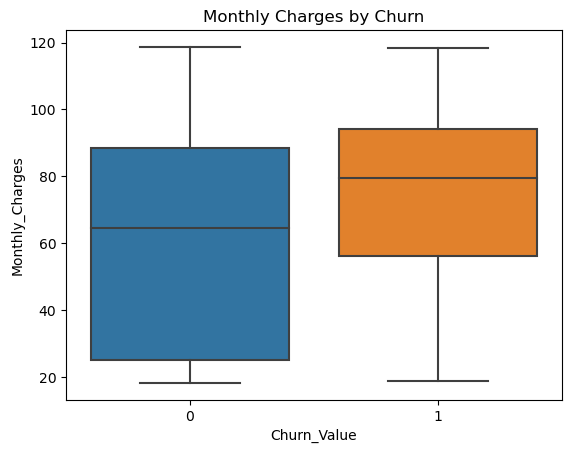

In [16]:
sns.boxplot(x='Churn_Value', y='Monthly_Charges', data=churn_df)
plt.title('Monthly Charges by Churn')
plt.show()

In [17]:
stats.mannwhitneyu(churn_df[churn_df['Churn_Value']==1]['Monthly_Charges'],churn_df[churn_df['Churn_Value']==0]['Monthly_Charges'],alternative='two-sided')


MannwhitneyuResult(statistic=6003125.5, pvalue=3.311627651988585e-54)

### A Mann–Whitney U test was performed to compare Monthly Charges for churners and non-churners.The test indicated a statistically significant difference (U = 6,003,125.5, p < 0.001), meaning customers with higher monthly charges are significantly more likely to churn.

## Which high-value customers (high CLTV) are at high churn risk?

In [18]:
churn_df['CLTV'].describe()

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

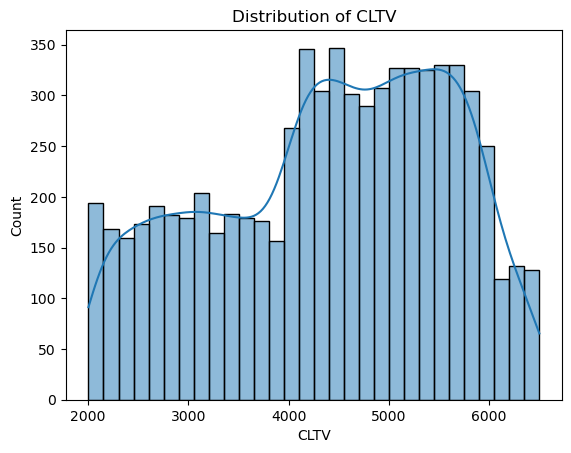

In [19]:
sns.histplot(churn_df['CLTV'], bins=30, kde=True)
plt.title('Distribution of CLTV')
plt.show()

In [20]:
high_cltv_threshold = churn_df['CLTV'].quantile(0.8)  # top 20%
churn_df['High_CLTV'] = (churn_df['CLTV'] >= high_cltv_threshold).astype(int)

In [21]:
churn_df.groupby('High_CLTV')['Churn_Value'].agg(['count','mean']).rename(columns={'mean':'Churn_Rate'})

,count,Churn_Rate
High_CLTV,,
0,5632,0.280185
1,1411,0.206237


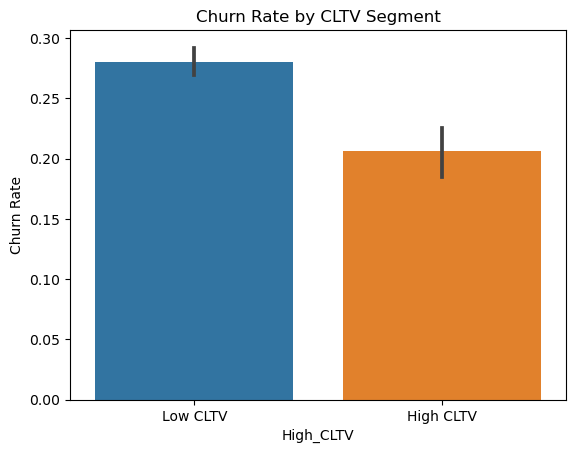

In [22]:
sns.barplot(x='High_CLTV', y='Churn_Value', data=churn_df, estimator=lambda x: sum(x)/len(x))
plt.xticks([0,1], ['Low CLTV','High CLTV'])
plt.ylabel('Churn Rate')
plt.title('Churn Rate by CLTV Segment')
plt.show()

In [23]:
total_revenue = churn_df['CLTV'].sum()

# revenue of top 20% CLTV customers
high_cltv_revenue = churn_df.loc[churn_df['High_CLTV']==1, 'CLTV'].sum()

# percentage
X = (high_cltv_revenue / total_revenue) * 100
print(f"Top 20% high-value customers contribute {X:.2f}% of total revenue")

Top 20% high-value customers contribute 26.91% of total revenue


In [24]:
Y = churn_df.loc[churn_df['High_CLTV']==1, 'Churn_Value'].mean() * 100
print(f"Churn rate among high-value customers: {Y:.2f}%")

Churn rate among high-value customers: 20.62%


### We segmented customers based on CLTV. The top 20% high-value customers account for 26.91% of total revenue. The churn rate among these customers is 20.62%, which indicates that a significant portion of revenue is at risk. These customers should be prioritized for retention efforts

## How does payment method affect churn?

In [25]:
payment_churn = churn_df.groupby('Payment_Method')['Churn_Value'].agg(['count','mean']).rename(columns={'mean':'Churn_Rate'})
payment_churn.sort_values('Churn_Rate', ascending=False)

,count,Churn_Rate
Payment_Method,,
Electronic check,2365,0.452854
Mailed check,1612,0.191067
Bank transfer (automatic),1544,0.167098
Credit card (automatic),1522,0.152431


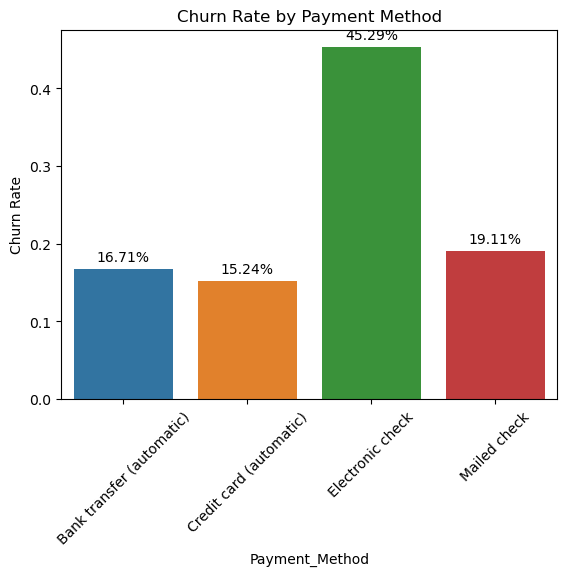

In [26]:
sns.barplot(x=payment_churn.index, y=payment_churn['Churn_Rate'])
plt.xticks(rotation=45)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')

# annotate bar values
for i, rate in enumerate(payment_churn['Churn_Rate']):
    plt.text(i, rate+0.01, f"{rate:.2%}", ha='center')
plt.show()

In [27]:
from scipy.stats import chi2_contingency

# create contingency table
contingency = pd.crosstab(churn_df['Payment_Method'], churn_df['Churn_Value'])

# run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

Chi-square test p-value: 3.6823546520097993e-140


### Customers paying via Electronic Check are more likely to churn. The company should investigate why — e.g., failed payments, lack of automatic reminders, or preference for more convenient payment options.

## Which service types or contract types have the highest churn?
## Are long term customers more loyal than month to month contracts?

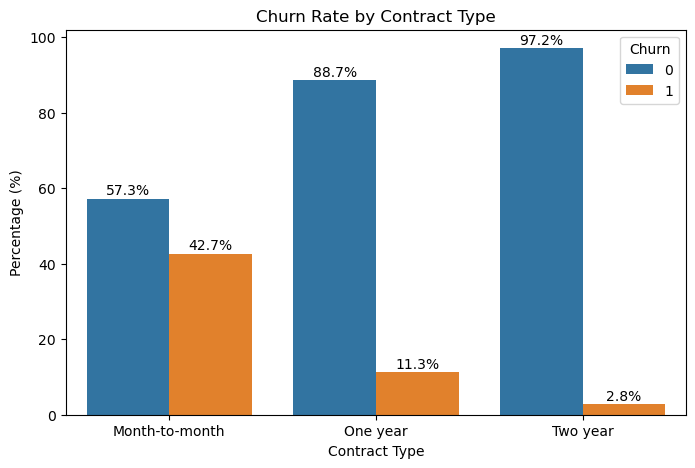

In [28]:
plt.figure(figsize=(8,5))
contract_churn = churn_df.groupby('Contract')['Churn_Value'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

ax = sns.barplot(data=contract_churn, x='Contract', y='percent', hue='Churn_Value')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Percentage (%)")
plt.xlabel("Contract Type")
plt.legend(title="Churn")

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

## Churn Rate by Internet Service Type

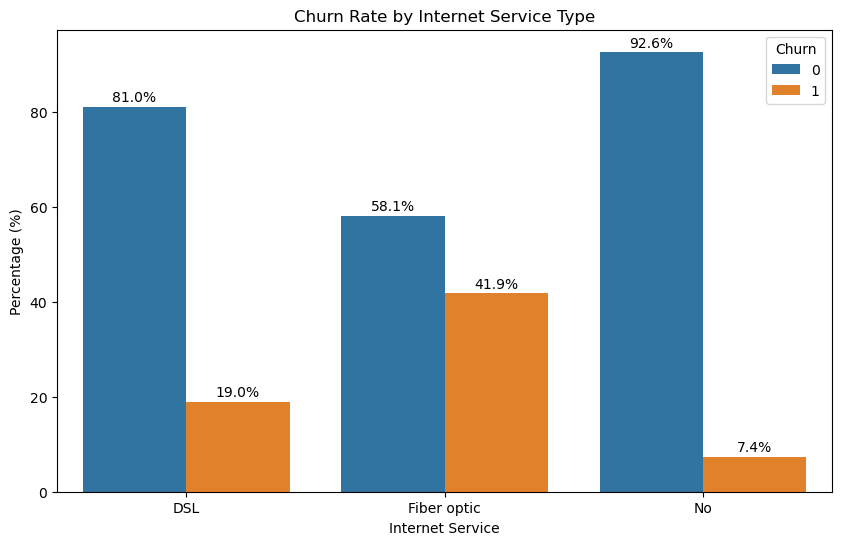

In [29]:
plt.figure(figsize=(10,6))
internet_churn = churn_df.groupby('Internet_Service')['Churn_Value'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

ax = sns.barplot(data=internet_churn, x='Internet_Service', y='percent', hue='Churn_Value')
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Percentage (%)")
plt.xlabel("Internet Service")
plt.legend(title="Churn")

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

## Does having Tech Support or Online Security reduce churn?

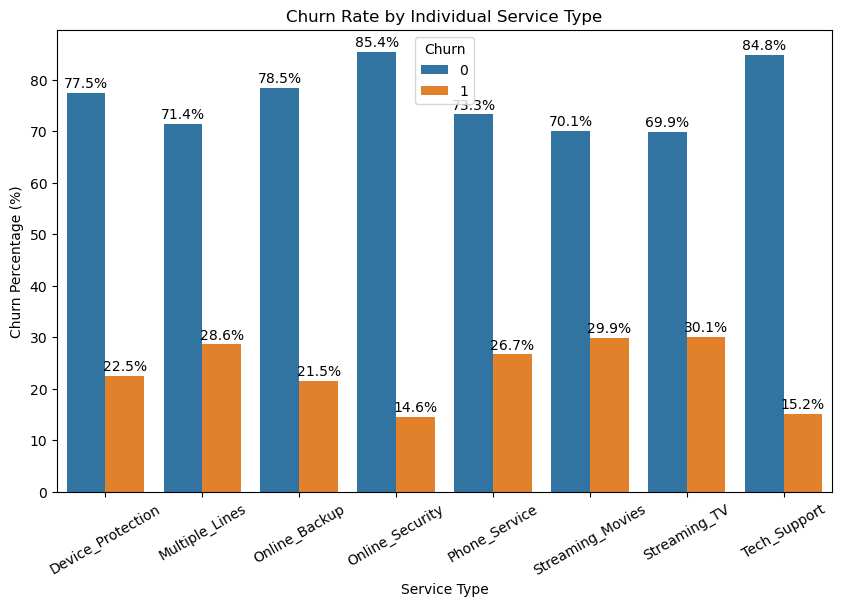

In [30]:
multiple_services = ['Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies']

# Melt the dataframe: convert columns → rows
df_melt = churn_df.melt(id_vars='Churn_Value',value_vars=multiple_services,var_name='Service',value_name='Status')

# Only keep customers who actually have the service ("Yes")
df_melt = df_melt[df_melt['Status'] == 'Yes']

# Calculate churn %
service_churn = (df_melt.groupby('Service')['Churn_Value'].value_counts(normalize=True).mul(100).rename('percent').reset_index())


plt.figure(figsize=(10,6))
ax = sns.barplot(data=service_churn, x='Service', y='percent', hue='Churn_Value')
plt.title("Churn Rate by Individual Service Type")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Service Type")
plt.xticks(rotation=30)
plt.legend(title="Churn")

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )

plt.show()

## Does the number of services a customer subscribes to affect churn?

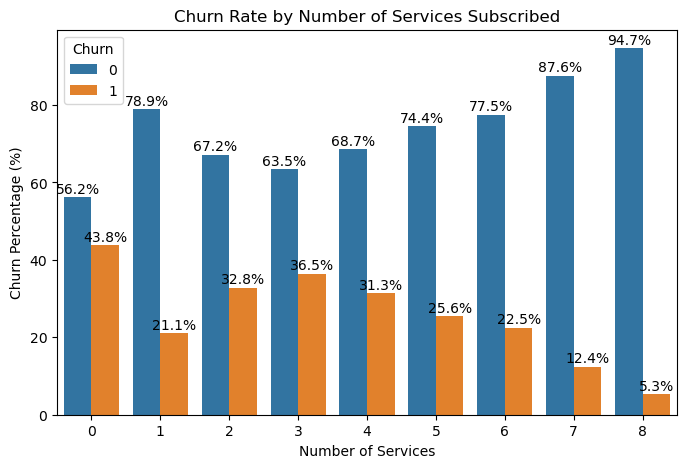

In [31]:
multiple_services = ['Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies']

churn_df['num_services'] = churn_df[multiple_services].eq("Yes").sum(axis=1)

service_churn = (
    churn_df.groupby('num_services')['Churn_Value'].value_counts(normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(8,5))
ax = sns.barplot(data=service_churn,x='num_services', y='percent',hue='Churn_Value')

plt.title("Churn Rate by Number of Services Subscribed")
plt.xlabel("Number of Services")
plt.ylabel("Churn Percentage (%)")
plt.legend(title="Churn")

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

## How much revenue is lost due to customer churn?

In [32]:
churn_df['Churn_Value'].value_counts()

Churn_Value
0    5174
1    1869
Name: count, dtype: int64

In [33]:
revenue_lost_monthly = churn_df.loc[churn_df['Churn_Value'] == 1, 'Monthly_Charges'].sum()
print("Total monthly revenue lost due to churn: ", revenue_lost_monthly )

Total monthly revenue lost due to churn:  139130.85


In [34]:
total_revenue_lost = churn_df.loc[churn_df['Churn_Value'] == 1, 'Total_Charges'].sum()

print("Total revenue lost due to churn: ", total_revenue_lost)

Total revenue lost due to churn:  2862926.9


## Do customers with partners and dependents churn less?

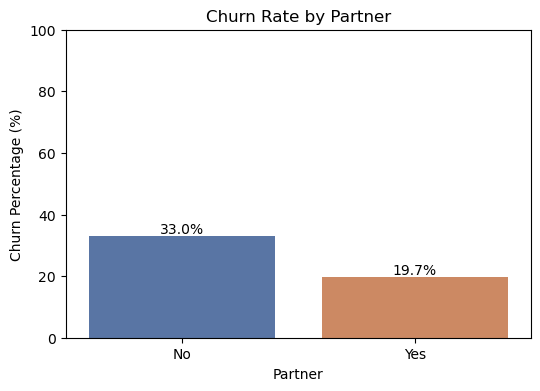

In [35]:
partner_churn = (churn_df.groupby('Partner')['Churn_Value'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='Churn_Percent'))

plt.figure(figsize=(6,4))
sns.barplot(data=partner_churn, x='Partner', y='Churn_Percent', palette='deep')
plt.title("Churn Rate by Partner")
plt.ylabel("Churn Percentage (%)")
plt.ylim(0,100)

for index, row in partner_churn.iterrows():
    plt.text(x=index, y=row['Churn_Percent'] + 1, s=f"{row['Churn_Percent']:.1f}%", ha='center')
plt.show()

### Customers without a partner have a higher churn rate (33%). Customers with a partner have a lower churn rate (19.7%).

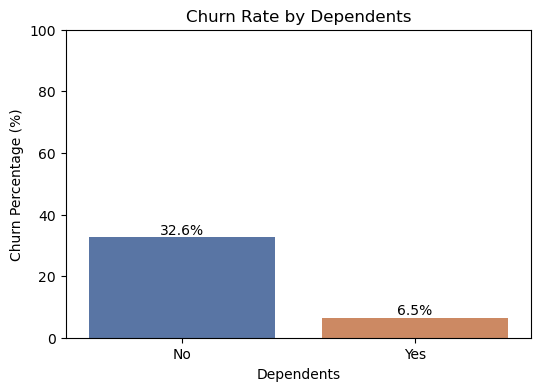

In [36]:
dependents_churn = (churn_df.groupby('Dependents')['Churn_Value'].apply(lambda x: (x == 1).mean() * 100).reset_index(name='Churn_Percent'))

plt.figure(figsize=(6,4))
sns.barplot(data=dependents_churn, x='Dependents', y='Churn_Percent', palette='deep')
plt.title("Churn Rate by Dependents")
plt.ylabel("Churn Percentage (%)")
plt.ylim(0,100)

for index, row in dependents_churn.iterrows():
    plt.text(x=index, y=row['Churn_Percent'] + 1, s=f"{row['Churn_Percent']:.1f}%", ha='center')
plt.show()

### Customers without dependents have a much higher churn rate (32.6%). Customers with dependents have a much lower churn rate (6.5%)

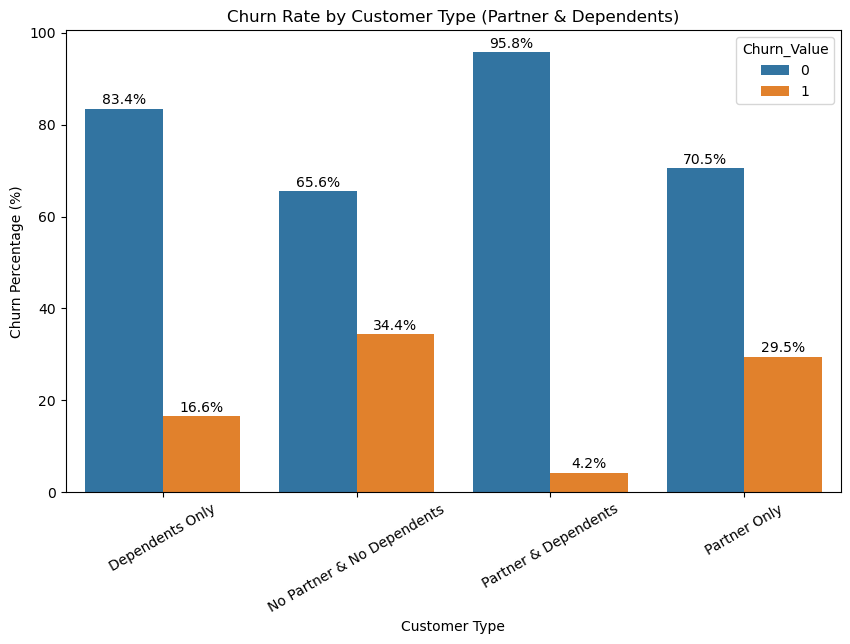

In [37]:
def label_combo(row):
    if row['Partner'] == 'Yes' and row['Dependents'] == 'Yes':
        return 'Partner & Dependents'
    elif row['Partner'] == 'Yes' and row['Dependents'] == 'No':
        return 'Partner Only'
    elif row['Partner'] == 'No' and row['Dependents'] == 'Yes':
        return 'Dependents Only'
    else:
        return 'No Partner & No Dependents'

churn_df['Customer_Type'] = churn_df.apply(label_combo, axis=1)

# Calculate churn %
combined_churn = (churn_df.groupby('Customer_Type')['Churn_Value'].value_counts(normalize=True).mul(100).rename('Churn_Percent').reset_index())


plt.figure(figsize=(10,6))
ax = sns.barplot(data=combined_churn, x='Customer_Type', y='Churn_Percent', hue='Churn_Value')
plt.title("Churn Rate by Customer Type (Partner & Dependents)")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Customer Type")
plt.xticks(rotation=30)

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )

plt.show()

## What customer demographics (Gender, Senior citizen, City, Zip code etc.) are most associated with churn?

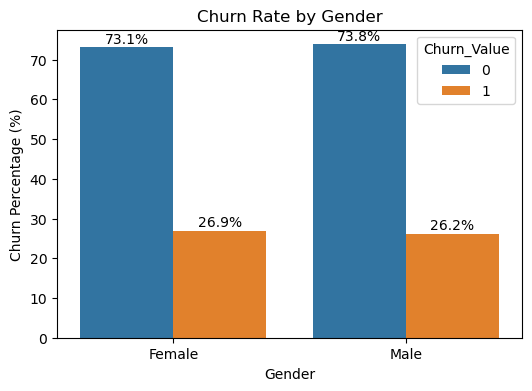

In [38]:
gender_churn = (churn_df.groupby('Gender')['Churn_Value'].value_counts(normalize=True).mul(100).rename('Churn_Percent').reset_index())

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(data=gender_churn, x='Gender', y='Churn_Percent', hue='Churn_Value')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Gender")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 1, f"{height:.1f}%", ha='center')
plt.show()

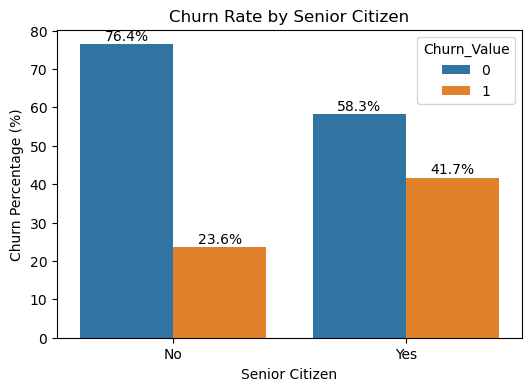

In [39]:
senior_churn = (churn_df.groupby('Senior_Citizen')['Churn_Value'].value_counts(normalize=True).mul(100).rename('Churn_Percent').reset_index())

plt.figure(figsize=(6,4))
ax = sns.barplot(data=senior_churn, x='Senior_Citizen', y='Churn_Percent', hue='Churn_Value')
plt.title("Churn Rate by Senior Citizen")
plt.ylabel("Churn Percentage (%)")
plt.xlabel("Senior Citizen")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 1, f"{height:.1f}%", ha='center')
plt.show()

In [40]:
unique_cities = churn_df['City'].unique()
print("Number of unique cities:", len(unique_cities))
print("Some sample cities:", unique_cities[:10]) 

Number of unique cities: 1129
Some sample cities: ['Los Angeles' 'Beverly Hills' 'Huntington Park' 'Lynwood'
 'Marina Del Rey' 'Inglewood' 'Santa Monica' 'Torrance' 'Whittier'
 'La Habra']


In [41]:
unique_codes = churn_df['Zip_Code'].unique()
print("Number of unique zip codes:", len(unique_codes))
print("Some sample codes:", unique_codes[:10]) 

Number of unique zip codes: 1652
Some sample codes: [90003 90005 90006 90010 90015 90020 90022 90024 90028 90029]


## City vs Churn

In [42]:
print("Number of unique cities:", churn_df['City'].nunique())

Number of unique cities: 1129


In [43]:
city_churn = churn_df.groupby('City')['Churn_Value'].sum().reset_index(name='Churn_Count')

# Sort by churn count and take top 10
top_cities = city_churn.sort_values(by='Churn_Count', ascending=False).head(10)

# Check the top cities
print(top_cities)

              City  Churn_Count
562    Los Angeles           90
869      San Diego           50
872  San Francisco           31
878       San Jose           29
855     Sacramento           26
354         Fresno           16
556     Long Beach           15
702        Oakland           13
371       Glendale           13
972       Stockton           12


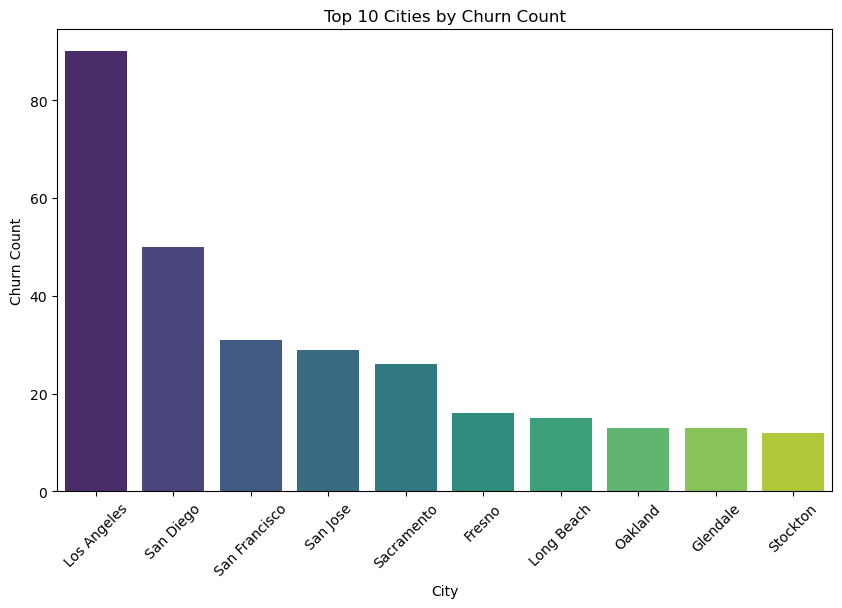

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Churn_Count', data=top_cities, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Churn Count')
plt.xlabel('City')
plt.ylabel('Churn Count')
plt.show()

In [45]:
churn_df.columns

Index(['City', 'Zip_Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'High_CLTV', 'num_services', 'Customer_Type'],
      dtype='object')

In [48]:
features = ['Gender','Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'Zip_Code']

df_model = churn_df[features].copy()
df_model.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value,CLTV,Zip_Code
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,90003
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701,90005
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372,90006
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003,90010
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340,90015


In [49]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [50]:
for col in df_model.columns:
    print(f"\n -------Column: {col}----------")
    print(f"Unique values count: {df_model[col].nunique(dropna=False)}")
    print(f"Unique values: {df_model[col].unique()}")


 -------Column: Gender----------
Unique values count: 2
Unique values: ['Male' 'Female']

 -------Column: Senior_Citizen----------
Unique values count: 2
Unique values: ['No' 'Yes']

 -------Column: Partner----------
Unique values count: 2
Unique values: ['No' 'Yes']

 -------Column: Dependents----------
Unique values count: 2
Unique values: ['No' 'Yes']

 -------Column: Tenure_Months----------
Unique values count: 73
Unique values: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

 -------Column: Phone_Service----------
Unique values count: 2
Unique values: ['Yes' 'No']

 -------Column: Multiple_Lines----------
Unique values count: 3
Unique values: ['No' 'Yes' 'No phone service']

 -------Column: Internet_Service----------
Unique values count: 3
Unique values: ['DSL' 'Fiber optic' 'No']

 -------Column: Online_S

### Chi-Square test of independence between each categorical feature and target variable (Churn Value)

In [55]:
categorical_cols= ['Gender', 'Senior_Citizen', 'Partner', 'Dependents',
 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
 'Payment_Method', 'Zip_Code']

In [56]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    table = pd.crosstab(churn_df[col], churn_df['Churn_Value'])
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"{col}: p-value = {p:.5f}")

Gender: p-value = 0.48658
Senior_Citizen: p-value = 0.00000
Partner: p-value = 0.00000
Dependents: p-value = 0.00000
Phone_Service: p-value = 0.33878
Multiple_Lines: p-value = 0.00346
Internet_Service: p-value = 0.00000
Online_Security: p-value = 0.00000
Online_Backup: p-value = 0.00000
Device_Protection: p-value = 0.00000
Tech_Support: p-value = 0.00000
Streaming_TV: p-value = 0.00000
Streaming_Movies: p-value = 0.00000
Contract: p-value = 0.00000
Paperless_Billing: p-value = 0.00000
Payment_Method: p-value = 0.00000
Zip_Code: p-value = 0.05118


### The Point-Biserial correlation to confirms that the numeric features have meaningful, statistically significant relationships with churn

In [78]:
# sometimes numeric columns are read as strings because of missing values, mixed data types in a column. Converts the column to a numeric data type (int or float).
# errors='coerce' means: Any value that cannot be converted to a number is replaced with NaN (missing value)
num_cols = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV']
for col in num_cols:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

In [77]:
df_model[['Tenure_Months','Monthly_Charges','Total_Charges','CLTV', 'Churn_Value']].corr()['Churn_Value'].sort_values(ascending=False)

Churn_Value        1.000000
Monthly_Charges    0.193356
CLTV              -0.127463
Total_Charges     -0.198324
Tenure_Months     -0.352229
Name: Churn_Value, dtype: float64

In [60]:
from scipy.stats import pointbiserialr

for col in ['Monthly_Charges', 'Tenure_Months', 'Total_Charges', 'CLTV']:
    corr, p = pointbiserialr(df_model[col], df_model['Churn_Value'])
    print(col, corr, p)

Monthly_Charges 0.19335642223784705 2.706645606888192e-60
Tenure_Months -0.35222867011307796 7.9990579605966e-205
Total_Charges -0.19832426260399558 2.1272116132395556e-63
CLTV -0.1274631017174497 6.679131381698816e-27


In [62]:
# 1. Define features and target

categorical_cols= ['Senior_Citizen', 'Partner', 'Dependents', 'Multiple_Lines',
                   'Internet_Service','Online_Security', 'Online_Backup', 'Device_Protection',
                   'Tech_Support','Streaming_TV', 'Streaming_Movies', 'Contract',
                   'Paperless_Billing','Payment_Method']

numeric_cols = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV']

target = 'Churn_Value'

feature_cols = numeric_cols + categorical_cols
X = df_model[feature_cols]
y = df_model[target]


# 2. One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(X_encoded.shape)
print(X_encoded.columns)  # look at new columns

(7043, 29)
Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV',
       'Senior_Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Multiple_Lines_No phone service', 'Multiple_Lines_Yes',
       'Internet_Service_Fiber optic', 'Internet_Service_No',
       'Online_Security_No internet service', 'Online_Security_Yes',
       'Online_Backup_No internet service', 'Online_Backup_Yes',
       'Device_Protection_No internet service', 'Device_Protection_Yes',
       'Tech_Support_No internet service', 'Tech_Support_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Movies_No internet service', 'Streaming_Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless_Billing_Yes',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check'],
      dtype='object')


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5634, 29)
Shape of X_test: (1409, 29)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


## Logistic Regression

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
#preprocessing
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.1,class_weight="balanced",solver="liblinear")
model.fit(X_train,y_train)
print('model intercept',model.intercept_)
print('coefficients',model.coef_)

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test)

#performance measures'''

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

model intercept [-0.72286524]
coefficients [[-0.99359724 -0.03181345  0.27985468  0.02299958  0.01145393  0.12954882
  -0.67113823  0.13320808  0.1298306   0.3771957  -0.04700193 -0.04700193
  -0.17024792 -0.04700193 -0.06066743 -0.04700193 -0.02122586 -0.04700193
  -0.15235008 -0.04700193  0.11653149 -0.04700193  0.12550075 -0.31902915
  -0.58604351  0.15419265 -0.00766167  0.18657772  0.0220429 ]]
[[757 278]
 [ 84 290]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



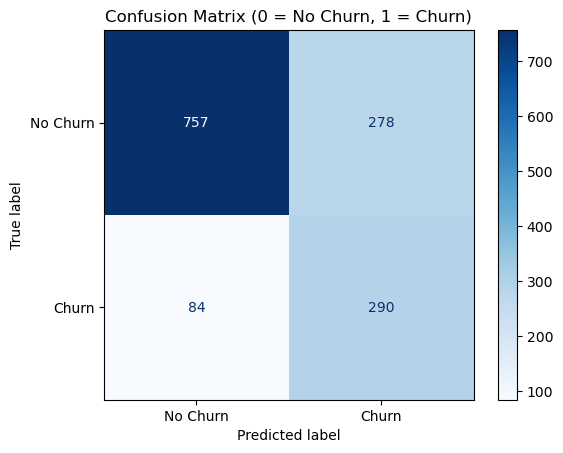

              precision    recall  f1-score   support

    No Churn       0.90      0.73      0.81      1035
       Churn       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [70]:
# Define readable labels
labels = [0, 1]
names = ["No Churn", "Churn"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (0 = No Churn, 1 = Churn)")
plt.show()

# Classification report with readable labels
print(classification_report(y_test, y_pred, target_names=names))

## Random Forest Classifier

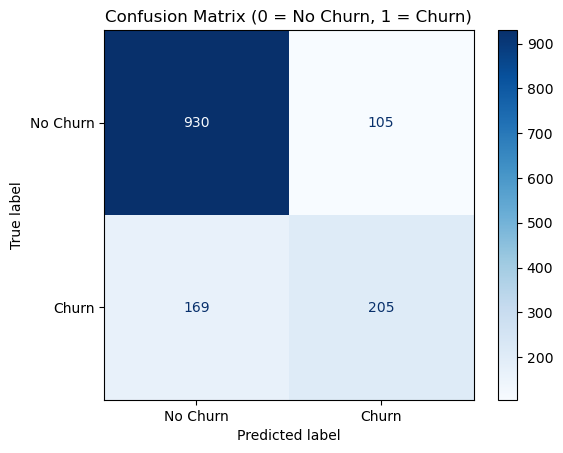

              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87      1035
       Churn       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [73]:
rfc=RandomForestClassifier(n_estimators=30,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

# Define readable labels
labels = [0, 1]
names = ["No Churn", "Churn"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (0 = No Churn, 1 = Churn)")
plt.show()

# Classification report with readable labels
print(classification_report(y_test, y_pred, target_names=names))

In [74]:
# Feature Importance

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
    'Feature': X_encoded.columns[indices],
    'Importance': importances[indices]
})
print(top_features.head(15))

                                  Feature  Importance
0                           Total_Charges    0.153236
1                           Tenure_Months    0.150324
2            Internet_Service_Fiber optic    0.094964
3                         Monthly_Charges    0.091938
4                                    CLTV    0.075125
5                          Dependents_Yes    0.062581
6         Payment_Method_Electronic check    0.056657
7                       Contract_Two year    0.049112
8                       Contract_One year    0.029415
9                     Online_Security_Yes    0.026791
10                  Paperless_Billing_Yes    0.022554
11                       Tech_Support_Yes    0.019268
12                      Online_Backup_Yes    0.015858
13  Device_Protection_No internet service    0.014013
14                            Partner_Yes    0.013206


### Feature Importance Analysis using Random Forest Classifier

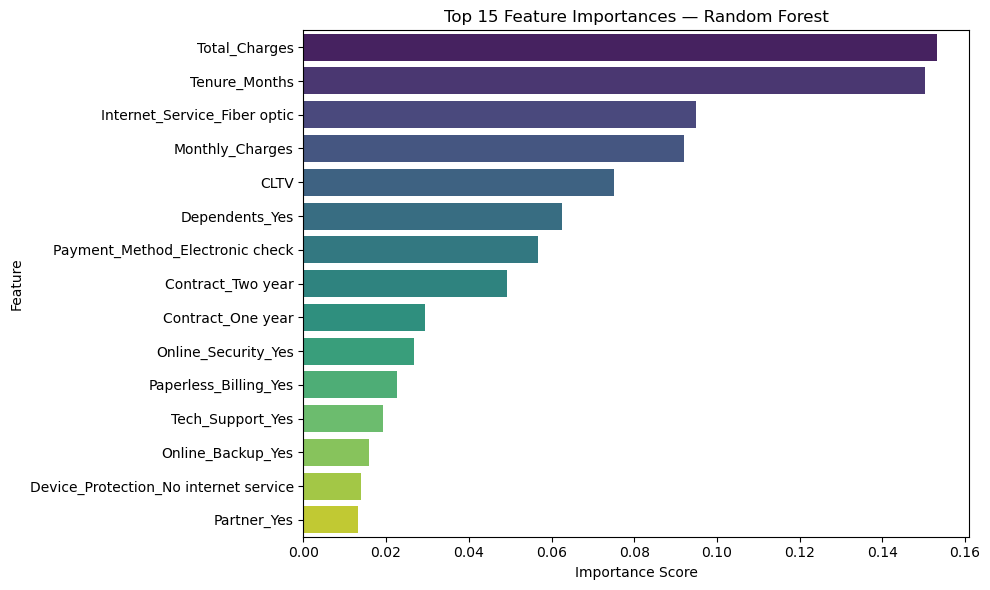

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_features['Importance'].head(15),
    y=top_features['Feature'].head(15),
    palette='viridis'
)
plt.title('Top 15 Feature Importances — Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### From the above graph customer Total Charges,Tenure Months, Internet Service_Fiber optic, Monthly Charges, CLTV are the five strongest churn determinants